# AdaBoost

# Import, Visualize and Split the dataset

### Import

In [23]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

rng

RandomState(MT19937) at 0x7F11120B3780

### Visualize

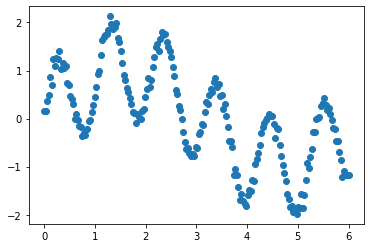

In [24]:
plt.scatter(X, y)

### split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng) 

# Train and Visualize and Predict with the AdaBoostRegressor

### train

In [28]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

dt_regr = DecisionTreeRegressor(max_depth=4)
ab_regr = AdaBoostRegressor( DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng )

dt_regr.fit(X, y)
ab_regr.fit(X, y)

y_pred_dt = dt_regr.predict(X)
y_pred_ab = ab_regr.predict(X)

### score (MSE)

In [32]:
from sklearn.metrics import mean_squared_error

dt_mse = mean_squared_error(y, y_pred_dt)
ab_mse = mean_squared_error(y, y_pred_ab)
print("The MSE for Decision Tree is: {:.4f}".format(dt_mse))
print("The MSE for AdaBoost is: {:.4f}".format(ab_mse))

The MSE for Decision Tree is: 0.1412
The MSE for AdaBoost is: 0.0202


### visualize

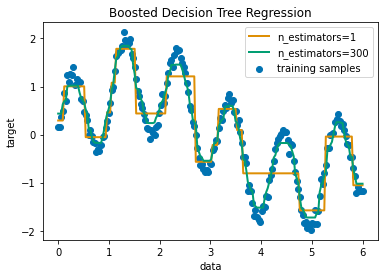

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_pred_dt, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_pred_ab, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()